<a href="https://colab.research.google.com/github/tormenteddave/thisisdavespublic/blob/main/SQL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3
import pandas as pd

In [3]:
con = sqlite3.connect('sakila.db')

In [4]:
def sql_to_df(sql_query):
  df = pd.read_sql(sql_query, con)
  return df

In [7]:
query = '''
SELECT *
FROM sqlite_master
WHERE type = 'table';
'''

tables = sql_to_df(query)
tables

,type,name,tbl_name,rootpage,sql
0,table,actor,actor,5,CREATE TABLE actor (\r\n actor_id numeric NOT...
1,table,country,country,8,CREATE TABLE country (\r\n country_id SMALLIN...
2,table,city,city,12,"CREATE TABLE city (\r\n city_id int NOT NULL,..."
3,table,address,address,53,CREATE TABLE address (\r\n address_id int NOT...
4,table,language,language,81,CREATE TABLE language (\r\n language_id SMALL...
5,table,category,category,84,CREATE TABLE category (\r\n category_id SMALL...
6,table,customer,customer,86,CREATE TABLE customer (\r\n customer_id INT N...
7,table,film,film,93,"CREATE TABLE film (\r\n film_id int NOT NULL,..."
8,table,film_actor,film_actor,98,CREATE TABLE film_actor (\r\n actor_id INT NO...
9,table,film_category,film_category,103,CREATE TABLE film_category (\r\n film_id INT ...


In [9]:
query = '''
  SELECT first_name, last_name
  FROM customer
'''

customer_names = sql_to_df(query)
customer_names


,first_name,last_name
0,MARY,SMITH
1,PATRICIA,JOHNSON
2,LINDA,WILLIAMS
3,BARBARA,JONES
4,ELIZABETH,BROWN
...,...,...
594,TERRENCE,GUNDERSON
595,ENRIQUE,FORSYTHE
596,FREDDIE,DUGGAN
597,WADE,DELVALLE


In [10]:
print(customer_names.head())

  first_name last_name
0       MARY     SMITH
1   PATRICIA   JOHNSON
2      LINDA  WILLIAMS
3    BARBARA     JONES
4  ELIZABETH     BROWN


In [11]:
print(customer_names.tail())

    first_name  last_name
594   TERRENCE  GUNDERSON
595    ENRIQUE   FORSYTHE
596    FREDDIE     DUGGAN
597       WADE   DELVALLE
598     AUSTIN    CINTRON


In [12]:
print(customer_names.describe())

       first_name last_name
count         599       599
unique        591       599
top         TRACY   CINTRON
freq            2         1


In [13]:
print(customer_names.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   first_name  599 non-null    object
 1   last_name   599 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB
None


In [19]:
query = '''
  SELECT *
  FROM film
  WHERE description
  LIKE '%Pastry%'
'''

pastry_films = sql_to_df(query)
pastry_films

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2011-09-14 18:05:33
1,11,ALAMO VIDEOTAPE,A Boring Epistle of a Butler And a Cat who mus...,2006,1,None,6,0.99,126,16.99,G,"Commentaries,Behind the Scenes",2011-09-14 18:05:33
2,12,ALASKA PHANTOM,A Fanciful Saga of a Hunter And a Pastry Chef ...,2006,1,None,6,0.99,136,22.99,PG,"Commentaries,Deleted Scenes",2011-09-14 18:05:33
3,24,ANALYZE HOOSIERS,A Thoughtful Display of a Explorer And a Pastr...,2006,1,None,6,2.99,181,19.99,R,"Trailers,Behind the Scenes",2011-09-14 18:05:33
4,26,ANNIE IDENTITY,A Amazing Panorama of a Pastry Chef And a Boat...,2006,1,None,3,0.99,86,15.99,G,"Commentaries,Deleted Scenes",2011-09-14 18:05:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,896,TOOTSIE PILOT,A Awe-Inspiring Documentary of a Womanizer And...,2006,1,None,3,0.99,157,10.99,PG,"Commentaries,Deleted Scenes,Behind the Scenes",2011-09-14 18:05:53
75,921,UNCUT SUICIDES,A Intrepid Yarn of a Explorer And a Pastry Che...,2006,1,None,7,2.99,172,29.99,PG-13,"Trailers,Commentaries,Behind the Scenes",2011-09-14 18:05:54
76,931,VALENTINE VANISHING,A Thrilling Display of a Husband And a Butler ...,2006,1,None,7,0.99,48,9.99,PG-13,"Trailers,Behind the Scenes",2011-09-14 18:05:54
77,938,VELVET TERMINATOR,A Lacklusture Tale of a Pastry Chef And a Tech...,2006,1,None,3,4.99,173,14.99,R,Behind the Scenes,2011-09-14 18:05:54


In [20]:
query = '''
  SELECT
    COUNT(title) AS Count,
    rating
  FROM film
  WHERE description
  LIKE '%Pastry%'
  GROUP BY rating
  ORDER BY Count DESC;
'''

pastry_films_by_rating = sql_to_df(query)
pastry_films_by_rating

,Count,rating
0,20,G
1,17,NC-17
2,15,PG-13
3,14,R
4,13,PG


array([[<Axes: title={'center': 'Count'}>]], dtype=object)

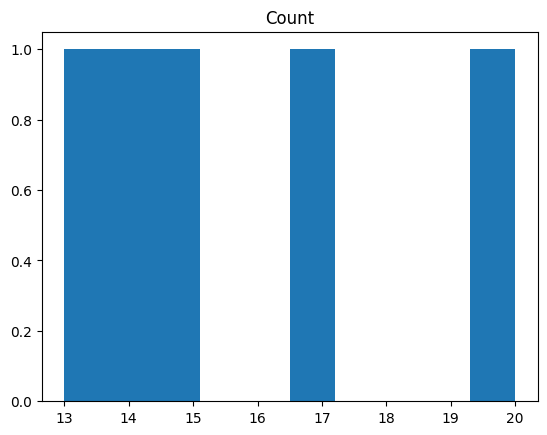

In [21]:
pastry_films_by_rating.hist(column='Count', grid=False)